This notebook shows:
* How to launch the [**StarGANv1**](https://arxiv.org/abs/1711.09020) model for inference
* Example of results for both
    * attrubutes **detection**
    * new face **generation** with desired attributes

Here I use [**PyTorch** implementation](https://github.com/yunjey/stargan) of the StarGANv1 model.

[StarGANv1](https://arxiv.org/abs/1711.09020) was chosen because:
* It provides an ability to generate images **contitionally**. One can control the "amount" of each desired feature via input vector.
* It can **train (relatively) fast** on (relatively) small resources.

The model is pretty old though and has its own drawbacks:
* It works well only with small resolution images (~128).
* For bigger images the artifacts are inavoidable. They sometimes happen even for 128x128 images.

The obvious improvement is to use newer model, e.g., [StarGANv2](https://arxiv.org/abs/1912.01865) which was released in April 2020. It generates much better images at much higher resolution. But it requires both huge resoruces and lots of time to train.

Prior to running this notebook please download the pretrained models:
```
../scripts/get_models.sh
```

# Imports

Imort necessary libraries

In [1]:
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
sys.path.extend(["../code/", "../stargan/"])

import torch
import torchvision.transforms as T

from PIL import Image
import matplotlib.pyplot as plt

from config import get_config

from solver import Solver

# Load model

Let's first load the config for the model. It is mostly default except for the:

* model checkpoint path
* style classes, their order and number

Note that in the original StarGANv1 model 5 classes are used: `[Black_Hair Blond_Hair Brown_Hair Male Young]`.

I retrained the model **4** times for different **face parts**. Each face part has several classes connected to it (see `DataExploration` notebook):
* **nose**: `[Big_Nose, Pointy_Nose]`
* **mouth**: `[Mouth_Slightly_Open, Smiling]`
* **eyes**: `[Arched_Eyebrows, Bushy_Eyebrows, Bags_Under_Eyes, Eyeglasses, Narrow_Eyes]`
* **hair**: `[Black_Hair, Blond_Hair, Brown_Hair, Gray_Hair, Bald Bangs, Receding_Hairline, Straight_Hair, Wavy_Hair]`

Here I show the examples only for **nose** class. But all other classes works in the same way and prediction examples are shown in the repo and in other notebooks.

In [2]:
config = get_config("""
--model_save_dir ../models/celeba_128_nose/
--test_iters 200000
--c_dim 2
--selected_attrs Big_Nose Pointy_Nose
""")

Load the model architecture with the provided config.

In [3]:
model = Solver(None, None, config)

Generator(
  (main): Sequential(
    (0): Conv2d(5, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ResidualBlock(
      (main): Sequential(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddi

/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vovacher/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vovacher/anaconda3/lib/python3.7/site-package

Restore model weights.

In [4]:
model.restore_model(model.test_iters)

Loading the trained models from step 200000...


# Prediction example

Let's read a test image.

Note that the **face position and size** should be comparable to what the model has seen in the training data (CelebA). Here I do not use any face detector and crop the faces manually. But in production environment one needs to setup the face detector correspondingly.

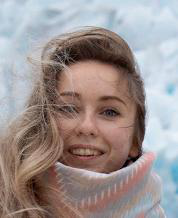

In [5]:
image = Image.open("../data/test.jpg")
image

The input to the network is **3x128x128 image in a range [-1; 1]** (note that the channels is the first dimension).

Thus one need to do preprocessing in advance.

In [6]:
transform = []
transform.append(T.Resize(128))
transform.append(T.CenterCrop(128))
transform.append(T.ToTensor())
transform.append(T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)))
transform = T.Compose(transform)

Create a batch of 1 image

In [7]:
x_real = torch.stack([transform(image)])
x_real.shape

torch.Size([1, 3, 128, 128])

## Attributes prediction

Let's first predict the attbibutes of the image. To do so I use the **Discriminator** part of the network. In StarGAN architecture it predicts not only the fake/real label but also the classes/attributes/styles of the image.

Here I call this vector **eigen style vector**. Note that due to the possible co-existence of multiple labels and the corresponding training procedure (Sigmoid + BCELoss instead of Softmax + CrossEntropyLoss) I use sigmoid activation function here and treat predicted labels separately (instead of softmax and 1-of-all). 

In [8]:
with torch.no_grad():
    eigen_style_vector = torch.sigmoid(model.D(x_real)[1])

Below is the probability of each label. The photo indeed depicts a person with a little bit pointy nose.

In [9]:
for proba, tag in zip(eigen_style_vector.numpy()[0], model.selected_attrs):
    print(f"{tag:20s}: {proba:.3f}")

Big_Nose            : 0.054
Pointy_Nose         : 0.257


Now let's look at how well the **Generator** model can recreate the face without altering it using the just computed eigen style vector.

In [10]:
with torch.no_grad():
    res_eigen = model.G(x_real, eigen_style_vector)
res_eigen.shape

torch.Size([1, 3, 128, 128])

Plot the original face and the reconstructed one:

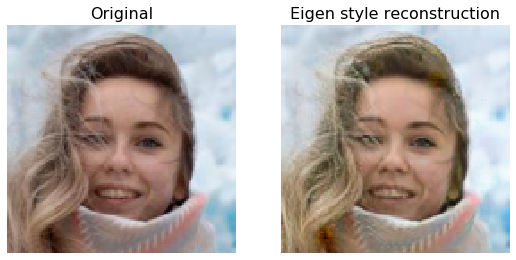

In [11]:
plt.figure(figsize=(9, 8))

plt.subplot(121)
_img = model.denorm(x_real).numpy()[0].transpose((1, 2, 0))
plt.imshow(_img)
plt.axis("off")
plt.title("Original", fontsize=16)

plt.subplot(122)
_img = model.denorm(res_eigen).numpy()[0].transpose((1, 2, 0))
plt.imshow(_img)
plt.axis("off")
plt.title("Eigen style reconstruction", fontsize=16);

Looks good enough.

## Face modification using new attributes

Now let's try to modify the face starting from the eigen style vector.

Let's say, I want to **make nose pointy**. To do so I am to set the corresponding style vector component to 1 and other component to 0 (because it's unlikely for nose to be big and pointy at the same time).

In [12]:
eigen_style_vector_modified_1 = eigen_style_vector.clone()
eigen_style_vector_modified_1[:, 0] = 0
eigen_style_vector_modified_1[:, 1] = 1

Now the style vector looks the following:

In [13]:
for proba, tag in zip(eigen_style_vector_modified_1.numpy()[0], model.selected_attrs):
    print(f"{tag:20s}: {proba:.3f}")

Big_Nose            : 0.000
Pointy_Nose         : 1.000


Let's try to generate face with this modified style vector:

In [14]:
with torch.no_grad():
    res_modified_1 = model.G(x_real, eigen_style_vector_modified_1)
res_modified_1.shape

torch.Size([1, 3, 128, 128])

Plot the faces:

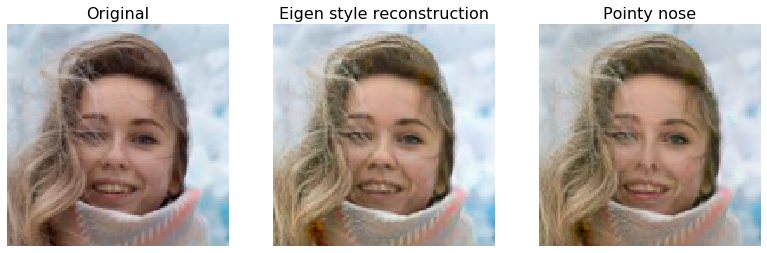

In [15]:
plt.figure(figsize=(13.5, 8))

plt.subplot(131)
_img = model.denorm(x_real).numpy()[0].transpose((1, 2, 0))
plt.imshow(_img)
plt.axis("off")
plt.title("Original", fontsize=16)

plt.subplot(132)
_img = model.denorm(res_eigen).numpy()[0].transpose((1, 2, 0))
plt.imshow(_img)
plt.axis("off")
plt.title("Eigen style reconstruction", fontsize=16);

plt.subplot(133)
_img = model.denorm(res_modified_1).numpy()[0].transpose((1, 2, 0))
plt.imshow(_img)
plt.axis("off")
plt.title("Pointy nose", fontsize=16);

It is also possible to change many attributes at a time, but here I have only 2 attributes. So for the example of changing many attributes at a time please look at other notebooks.